In [1]:
!pip install konlpy
!pip install nltk
!pip install wordcloud

     |████████████████████████████████| 19.4 MB 4.8 MB/s 
     |████████████████████████████████| 448 kB 45.0 MB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud
import requests
import time

In [3]:
# 랭킹순/최신순/평점 높은순/평점 낮은순
# REVIEW_RANKING/CREATE_DATE_DESC/REVIEW_SCORE_DESC/REVIEW_SCORE_ASC
# sortType 제거할 경우 최신 댓글순
url = "https://brand.naver.com/n/v1/reviews/paged-reviews?page=1&pageSize=30&merchantNo=510133398&originProductNo=5320357810&sortType=REVIEW_RANKING"
response = requests.get(url)
response

<Response [200]>

In [4]:
response.text[:500]

'{"contents":[{"id":"3372221063","reviewServiceType":"SELLBLOG","reviewType":"NORMAL","reviewContentClassType":"PHOTO","reviewContent":"맛있어요\\n어느날부턴가 \'유당불내증\'\\n하지만 소잘 우유 덕분에 맛있는 날이 계속입니다\\n서울에선 6개씩 묶음 4개 박스인거였는데\\n시골이라 그런가 통으로 한박스인게, 큰 박스에 담겨왔네요. 비닐이 적어져서 더 좋습니다\\n소잘우유도 빨대없는 버전 나오면 좋겠어요","createDate":"2022-02-21T01:36:39.229+0000","reviewDisplayStatusType":"NORMAL","repurchase":false,"reviewScore":5,"reviewRankingScore":-71.5965,"writerMemberId":"myzu****","writerMemberIdNo":"","writerMemberNo":0,"wri'

In [47]:
data = response.json()["contents"]
columns = ["id", "reviewContent", "createDate", "reviewScore"]
review_df = pd.DataFrame(data)[columns]
review_df.tail()

,id,reviewContent,createDate,reviewScore
25,3372877936,평소에 흰우유 마시면 배아픈데 이건 안아프고 고소해서 이 우유만 찾아 마시게 됩니다...,2022-02-22T01:43:52.386+0000,5
26,3373405060,배송빨났고 찌그러지지않고 잘 포장되어왔어요 그런데 유통기한이 6월이라고 봤는데 5월...,2022-02-22T12:20:40.530+0000,4
27,3371202771,"역시나 속편하게 마실 수 있어서 좋아요. 상온보관이라 편하고 아이들 간식으로도, 밖...",2022-02-19T07:24:13.605+0000,5
28,3369496492,믿고먹는 매일유업 소화가잘되는 우유!\n어느순간부터 일반우유 먹는게 소화가 안되서\...,2022-02-17T04:22:14.010+0000,5
29,3373268358,재구매했어요~\n배송이 빠르고 안전하게 잘 배송되었어요\n날짜도 넉넉하고 좋아요,2022-02-22T10:00:55.447+0000,5


In [45]:
bad = review_df.loc[review_df["reviewScore"]<=3]
bad

,id,reviewContent,createDate,reviewScore


In [ ]:
bad = df[(df['reviewScore'] >= 1 ) & (df['reviewScore'] <= 3)]

bad.tail(2)

In [ ]:
good = df[(df['reviewScore'] == 5) | (df['reviewScore'] == 4)]
good.tail(2)



In [6]:
reviews = pd.DataFrame()

def maeil_review2(type="REVIEW_RANKING", page=1):
    url=f"https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize=30&merchantNo=510133398&originProductNo=5320357810&sortType={type}"
    response = requests.get(url)
    data = response.json()
    data = data["contents"]
    return pd.DataFrame(data)[["id", "reviewContent", "createDate", "reviewScore"]]

In [7]:
for i in range(1,750):
    if(i%10==0):
        print('/',end="")
        time.sleep(1)
    df = maeil_review2("REVIEW_RANKING",i)
    reviews = pd.concat((reviews, df), ignore_index=True, sort=False)

reviews

//////////////////////////////////////////////////////////////////////////

,id,reviewContent,createDate,reviewScore
0,3372221063,맛있어요\n어느날부턴가 '유당불내증'\n하지만 소잘 우유 덕분에 맛있는 날이 계속입...,2022-02-21T01:36:39.229+0000,5
1,3372628245,항상 냉장고에 안떨어지게 넣어두는데 배도 안아프고 한번 먹기에 양도 딱 적당해서 좋...,2022-02-21T11:51:20.289+0000,5
2,3368381118,매일 마십니다 그래서 매일꺼를...ㅋㅋ\n배속이 편하니 손에 집히는데로\n목이마를때...,2022-02-15T15:12:27.646+0000,4
3,3369343213,매일 소화가 잘되는 우유 믿고 마십니딘. 유당 불내증이 있어 단백질 풍부한 우유를 ...,2022-02-17T00:54:01.746+0000,5
4,3374489210,쿠키가 너무 잘먹어요 옴뇸뇸 강아지전용 우유 먹으면 잘 토했는데 이건 먹어도 괜찮아...,2022-02-24T01:02:48.412+0000,5
...,...,...,...,...
22465,3328568925,아이먹일려고 구매했는데 안먹네요 ㅠㅠ 제가 열심히 먹고있는데 이맛난걸 왜 안먹는지 ...,2021-12-20T12:12:50.639+0000,5
22466,3328114889,별 10개\n보관 하기도 먹기도 편해요\n늘 잘 먹고 있어요,2021-12-20T01:38:17.039+0000,5
22467,3319011056,락토프리 좋아요 멸균우유 처음인데 맛있네요,2021-12-07T11:48:22.498+0000,5
22468,3311157468,아기 분유에서 우유로 넘어갈 단계라 샀어요. 어른이 제가 자주 마시던 우유라 아기도...,2021-11-26T05:41:59.522+0000,5


In [51]:
bad = reviews[(reviews['reviewScore'] >= 1 ) & (reviews['reviewScore'] <= 3)]
bad

,id,reviewContent,createDate,reviewScore
12,3373114748,배송이 정말 빠르네요.\n1개도 터짐없이 완전 꼼꼼하게 왔어요.\n빨대 없이도 팔았...,2022-02-22T07:01:33.254+0000,3
32,3365645322,일반 우유는 배 아파서 간식용으로 구매했어요 유통기한은 두달 조금 넘게 남았는데 ...,2022-02-12T02:00:06.600+0000,3
44,3372281382,5일에 주문해서 18일에 받았어요. 택배 파업지역이라 그렇다 해도 너무너무 늦네요...,2022-02-21T02:37:03.443+0000,3
60,3373015611,제품은 워낙 자주 마시는거라 좋은데 배송받는데 꼬박 열흘이 걸렸네요~^^하...\n...,2022-02-22T04:50:40.009+0000,3
90,3370902341,락토프리라서 그런지 제가 예전에 알던 멸균우유 보다는 맛이 묽네요. 그래도 실온보관...,2022-02-19T01:04:59.510+0000,3
...,...,...,...,...
21993,3120506954,소잘우유 감사해요.,2021-02-25T09:46:28.390+0000,3
22082,3130382129,상품이 매우 좋습니다,2021-03-11T12:07:55.244+0000,3
22225,3117357863,애기가 좋아해요 배송이 조금 느렸어요,2021-02-21T05:59:11.502+0000,3
22253,3121087810,상품이 매우 좋습니다,2021-02-26T04:53:53.579+0000,3


In [52]:
good = reviews[(reviews['reviewScore'] > 3)]
good

,id,reviewContent,createDate,reviewScore
0,3372221063,맛있어요\n어느날부턴가 '유당불내증'\n하지만 소잘 우유 덕분에 맛있는 날이 계속입...,2022-02-21T01:36:39.229+0000,5
1,3372628245,항상 냉장고에 안떨어지게 넣어두는데 배도 안아프고 한번 먹기에 양도 딱 적당해서 좋...,2022-02-21T11:51:20.289+0000,5
2,3368381118,매일 마십니다 그래서 매일꺼를...ㅋㅋ\n배속이 편하니 손에 집히는데로\n목이마를때...,2022-02-15T15:12:27.646+0000,4
3,3369343213,매일 소화가 잘되는 우유 믿고 마십니딘. 유당 불내증이 있어 단백질 풍부한 우유를 ...,2022-02-17T00:54:01.746+0000,5
4,3374489210,쿠키가 너무 잘먹어요 옴뇸뇸 강아지전용 우유 먹으면 잘 토했는데 이건 먹어도 괜찮아...,2022-02-24T01:02:48.412+0000,5
...,...,...,...,...
22465,3328568925,아이먹일려고 구매했는데 안먹네요 ㅠㅠ 제가 열심히 먹고있는데 이맛난걸 왜 안먹는지 ...,2021-12-20T12:12:50.639+0000,5
22466,3328114889,별 10개\n보관 하기도 먹기도 편해요\n늘 잘 먹고 있어요,2021-12-20T01:38:17.039+0000,5
22467,3319011056,락토프리 좋아요 멸균우유 처음인데 맛있네요,2021-12-07T11:48:22.498+0000,5
22468,3311157468,아기 분유에서 우유로 넘어갈 단계라 샀어요. 어른이 제가 자주 마시던 우유라 아기도...,2021-11-26T05:41:59.522+0000,5


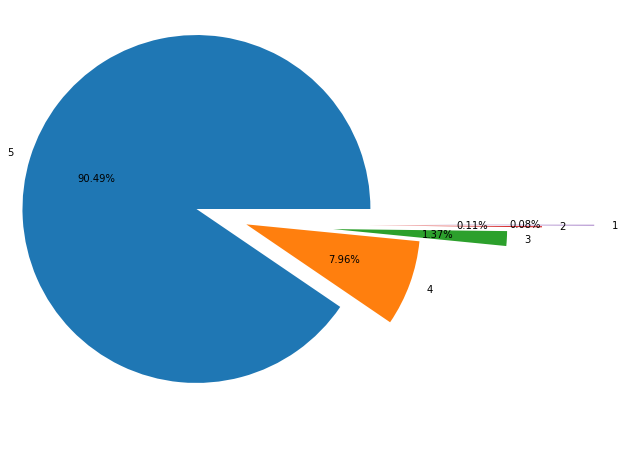

In [38]:
cnt = reviews['reviewScore'].value_counts()
explode = [0.30, 0, 0.50, 0.70, 1]
plt.figure(figsize=(8,8))
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%', explode = explode)
plt.show()

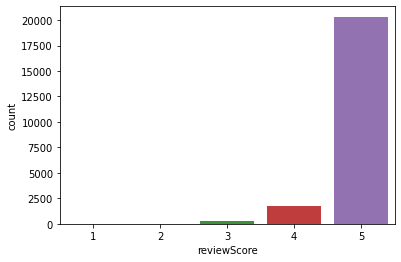

In [53]:
import seaborn as sns
sns.countplot(x="reviewScore", data = reviews)
plt.show()

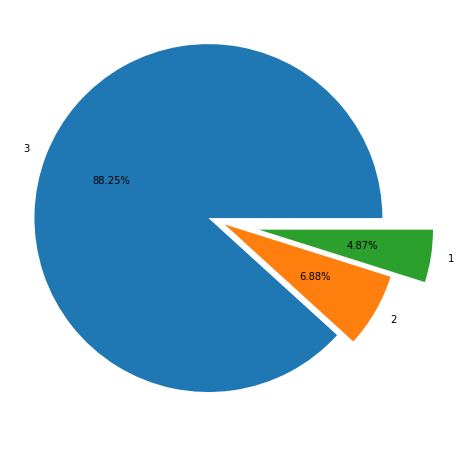

In [60]:
cnt = bad['reviewScore'].value_counts()
explode = [0.10, 0, 0.20]
plt.figure(figsize=(8,8))
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%', explode = explode)
plt.show()

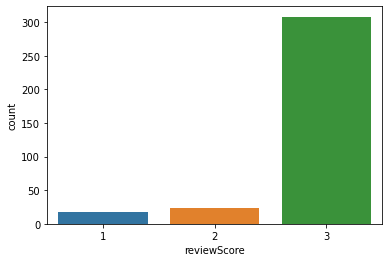

In [54]:
import seaborn as sns
sns.countplot(x="reviewScore", data = bad)
plt.show()

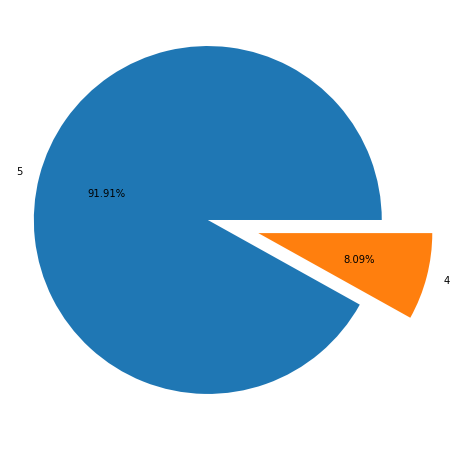

In [61]:
cnt = good['reviewScore'].value_counts()
explode = [0.10, 0.20]
plt.figure(figsize=(8,8))
plt.pie(cnt.values,labels=cnt.index,autopct='%.2f%%', explode = explode)
plt.show()

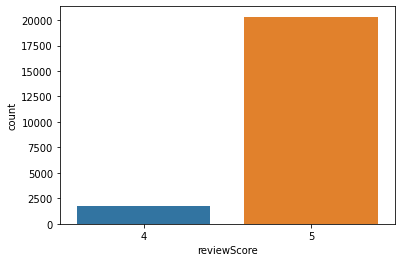

In [55]:
import seaborn as sns
sns.countplot(x="reviewScore", data = good)
plt.show()

In [8]:
text = " ".join(df["reviewContent"].values)
len(text), text[:50]

(1028, '항상 주문하는 우유\n이제 요것만 먹어요 멸균이라도 유통기한이 임박한걸 보내주는 곳도 있던데')

In [9]:
# 형태소 분석
okt = Okt()

In [10]:
%%time
nouns = okt.nouns(text)

CPU times: user 11.8 s, sys: 348 ms, total: 12.1 s
Wall time: 6.97 s


In [11]:
nouns[:30]

['항상',
 '주문',
 '우유',
 '이제',
 '요것',
 '멸균',
 '유통',
 '기한',
 '임박',
 '걸',
 '곳도',
 '유통',
 '기한',
 '마트',
 '우유',
 '브랜드',
 '상품',
 '때',
 '여분',
 '늘',
 '구비',
 '멸균',
 '우유',
 '박스',
 '곳',
 '배송',
 '배송',
 '아이',
 '계속',
 '구매']

In [18]:
%%time
pos = okt.pos(text)

CPU times: user 334 ms, sys: 4.34 ms, total: 338 ms
Wall time: 177 ms


In [19]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [20]:
verbs = [word for word, tagset in pos if tagset == "Verb"]
verbs[:20]

['하는',
 '먹어요',
 '보내주는',
 '큰',
 '사먹지만',
 '떨어질',
 '해',
 '두는',
 '터진',
 '감사합니다',
 '잘',
 '먹고있어요',
 '찾으시는',
 '되고',
 '감사합니다',
 '드렸어요',
 '잘',
 '드시고',
 '시켜',
 '먹겠습니다']

In [ ]:
# 워드 클라우드 만들기

In [12]:
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud

In [13]:
okt = Okt()
nouns = okt.nouns(text)
article = Text(nouns, name="reviewContent")
data = article.vocab() 

In [14]:
wc = WordCloud(font_path="D2Coding.ttf", background_color="white")

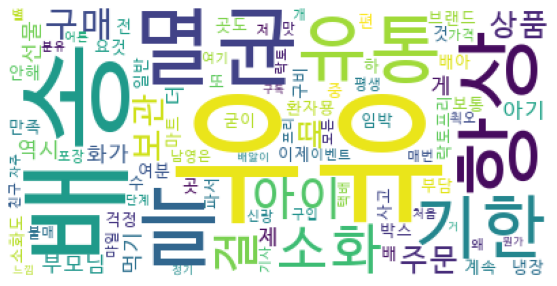

In [15]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(data))
plt.axis('off')
plt.show()

In [21]:
# 불필요한 단어 제거
stop_words = ["항상", "늘", "걸", "우유"]
words = dict(data)
for stop_word in stop_words:
  del words[stop_word]

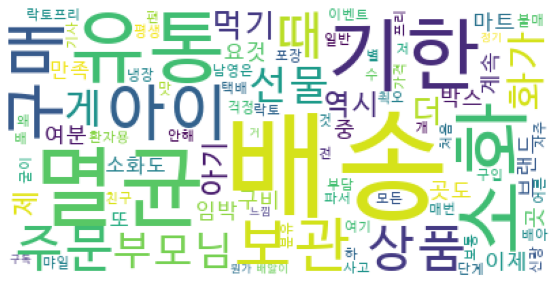

In [22]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()

In [76]:
# bad
text = " ".join(bad["reviewContent"].values)
okt = Okt()
nouns = okt.nouns(text)
article = Text(nouns, name="reviewContent")
data = article.vocab()
wc = WordCloud(font_path="D2Coding.ttf", background_color="white")

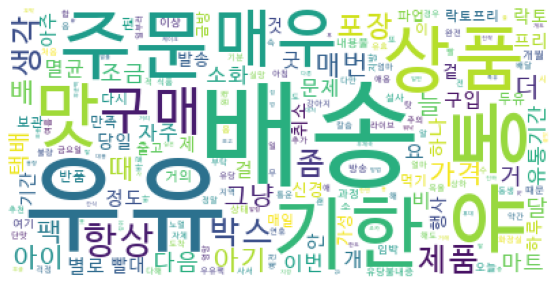

In [77]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(data))
plt.axis('off')
plt.show()

In [86]:
# 불필요한 단어 제거
stop_words = ["항상", "늘", "걸", "우유", "그냥", "배송", "유통", "기한", "상품", "매우"]
words = dict(data)
for stop_word in stop_words:
  del words[stop_word]

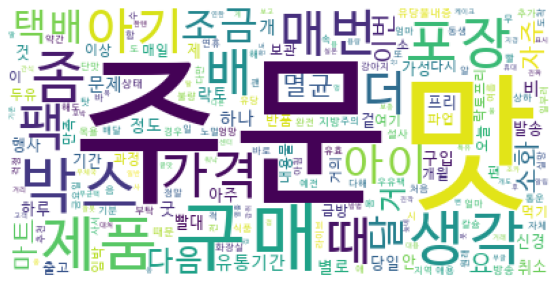

In [87]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()

In [88]:
# good
text = " ".join(good["reviewContent"].values)
okt = Okt()
nouns = okt.nouns(text)
article = Text(nouns, name="reviewContent")
data = article.vocab()
wc = WordCloud(font_path="D2Coding.ttf", background_color="white")

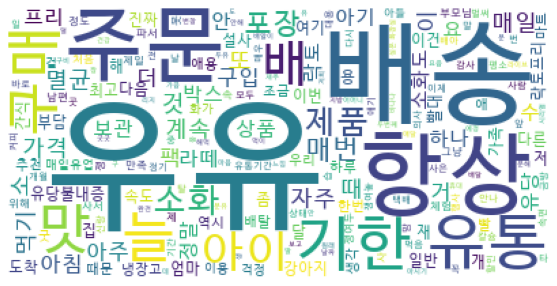

In [89]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(data))
plt.axis('off')
plt.show()

In [96]:
# 불필요한 단어 제거
stop_words = ["항상", "늘", "걸", "우유", "그냥", "유통", "기한", "배송", "배", "구매", "주문", "맛"]
words = dict(data)
for stop_word in stop_words:
  del words[stop_word]

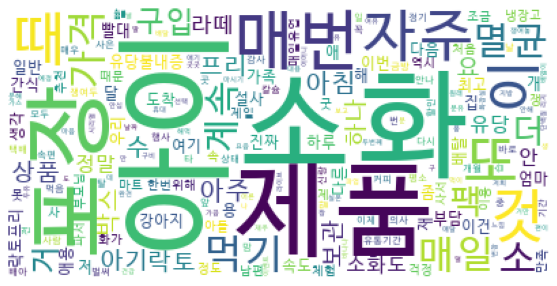

In [97]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()